# Goal

Customer Segmentation 
- Demographic Analysis
- Spending Behavior
- Marketing Campaign Analysis

### Insights from Analysis

Customer Profiles 
- Cluster 0: Budget-Consious Customer, Low Purchasing Power
- Cluster 1: Upper middle Income Customer. Not influenced by any marketing campaign.  
- Cluster 2: High Value Customer. High Income, High Purchasing Power. Marketing Campaign 5 is effective for response. Most purchased item is wine. 
- Cluster 3: Moderate purchasing power

### 1.0  Initial Dataset Exploration

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# pca
from sklearn.decomposition import PCA

# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage 

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


# evaluations
from sklearn.metrics import confusion_matrix

In [2]:
# load data 
data = pd.read_csv('customer_segmentation.csv')
df = data.copy()
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 2.0 Data Preparation

* Handling Missing Value - Drop "Income" Missing Value
* EDA Numerical Data - Identify Outlier using Boxplot
* Handing Outliers - Drop "Income" Outliers
* EDA Categorical Data - Identify Categories
* Feature Engineering
   - Age (INT)
   - Tenure (INT)
   - Total_Spent (INT)
   - Living_With (Binary, Alone or Partner)
   - Children (INT)
   - Family_Size (INT)
   - Is_Parent (Binary, 0 or 1) 
 * Drop Redundant Columns - ID

In [4]:
# drop missing values 'income' variable since it is less than 1%
df = df.dropna()
df.shape

(2216, 29)

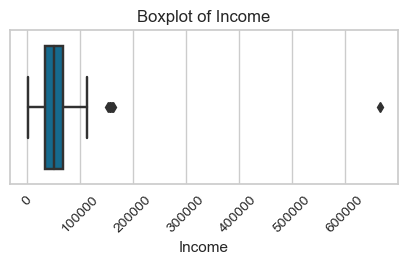

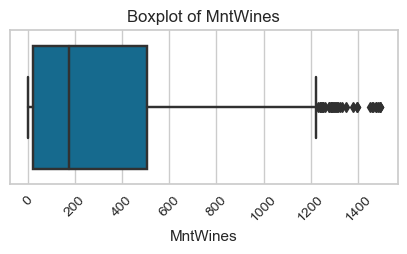

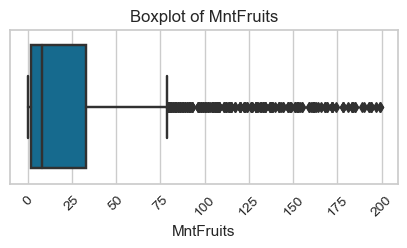

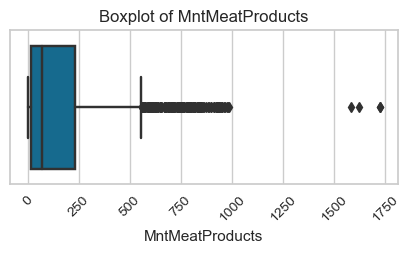

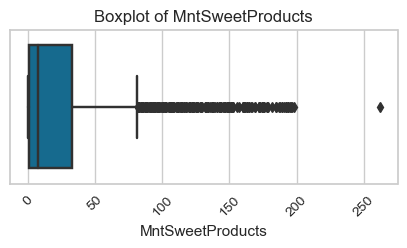

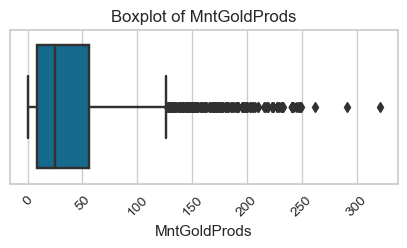

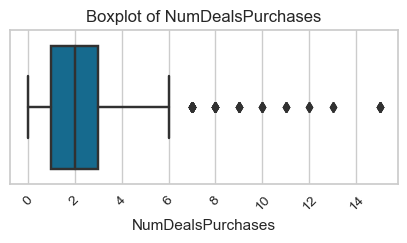

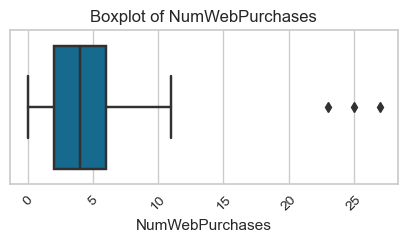

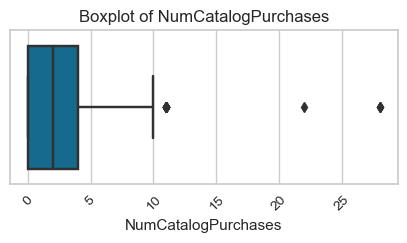

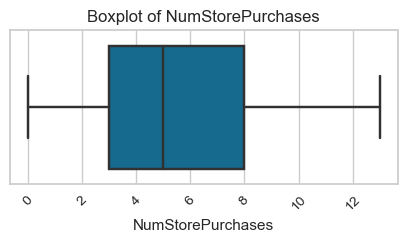

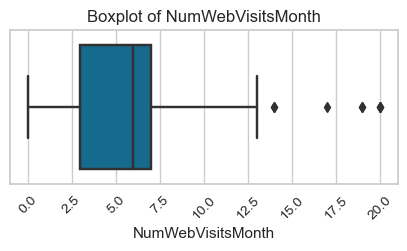

In [5]:
# plot boxplot to outlier check for continous value
continous_vars = ['Income', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                 'NumStorePurchases', 'NumWebVisitsMonth']

for i in continous_vars:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.xticks(rotation=45)
    plt.show()

In [6]:
# drop outlier found in 'income'
df = df.drop(df[df['Income'] > 600000].index)
df.shape

(2215, 29)

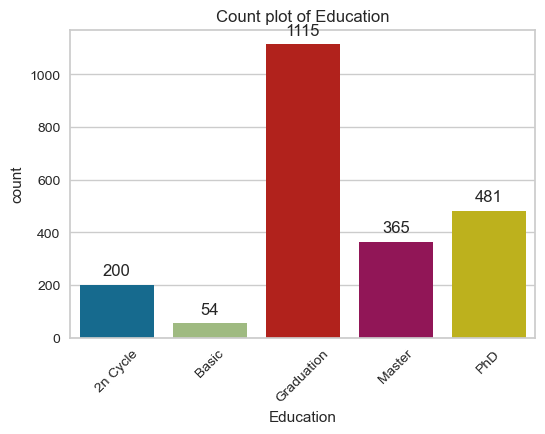

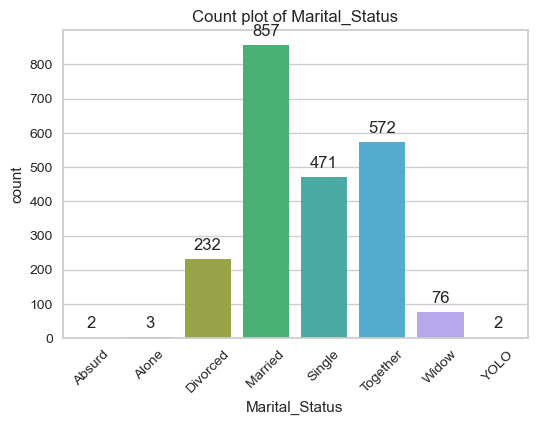

In [7]:
# plot countplot for categorical
categorical_vars = ['Education', 'Marital_Status']
df[categorical_vars] = df[categorical_vars].astype('category')

for i in categorical_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=i)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'Count plot of {i}')
    plt.xticks(rotation=45)
    plt.show()

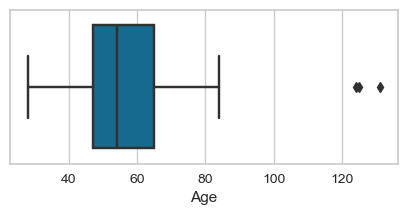

In [8]:
# New Feature - Age
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

plt.figure(figsize=(5,2))
sns.boxplot(data=df, x='Age')
plt.show()

In [9]:
# remove those age > 120
df = df.drop(df[df['Age'] >= 120].index)
df.shape

(2212, 30)

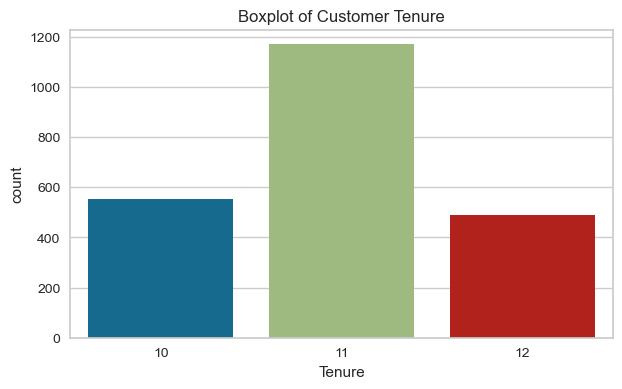

In [10]:
# New Feature - Tenure
# Convert object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
current_year = datetime.datetime.now().year
df['Tenure'] = current_year - df['Dt_Customer'].dt.year

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Tenure')
plt.title('Boxplot of Customer Tenure')
plt.show()

In [11]:
# New Feature - Total_Spent 
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [12]:
# New Feature - Living_With
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 
                                                      'Together':'Partner',
                                                      'Absurd':'Alone',
                                                      'Widow':'Alone',
                                                      'YOLO':'Alone',
                                                      'Divorced':'Alone',
                                                      'Single':'Alone'})


In [13]:
# New Feature - Children
df['Children'] = df['Kidhome'] + df['Teenhome']

In [14]:
# New Feature - Family_Size
df['Living_With_Num'] = df['Living_With'].replace({'Alone':1, 'Partner':2}).astype('int')
df['Family_Size'] = df['Living_With_Num'] + df['Children']

df.drop(columns=['Living_With_Num'], inplace=True)

In [15]:
# New Feature - Is Parent 
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [16]:
# Cleaning "Education" feature 
# Segmenting them into Undergraduate, Graduate, Postgraduate
df['Education'] = df['Education'].replace({'Basic':'Undergraduate',
                                             '2n Cycle':'Undergraduate',
                                             'Graduation':'Graduate',
                                             'Master':'Postgraduate',
                                             'PhD':'Postgraduate'})

In [17]:
# Label Encoding
label_encoder = LabelEncoder()
df['Education_Encoded'] = label_encoder.fit_transform(df['Education'])
df['Living_With_Encoded'] = label_encoder.fit_transform(df['Living_With'])


In [18]:
# dropping redundant features 
to_drop = ['ID', 'Marital_Status', 'Dt_Customer',
           'Z_CostContact', 'Z_Revenue', 
           'Year_Birth', 'Living_With', 'Education']
df = df.drop(to_drop, axis=1)

In [19]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,Total_Spent,Children,Family_Size,Is_Parent,Education_Encoded,Living_With_Encoded
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,12,1617,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,10,27,2,3,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,11,776,0,2,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,10,53,1,3,1,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,10,422,1,3,1,1,1


### 3.0 Data Analysis
1. What is the average expenditure of each product category (Wines, Fruits, MeatProducts, FishProduct, SweetProd, Gold)?
2. What is the recency distribution? 
3. How are the purchases commonly done? 
4. Which marketing Campaign is successful?

MntWines            305.287523
MntFruits            26.329566
MntMeatProducts     167.029837
MntFishProducts      37.648734
MntSweetProducts     27.046564
MntGoldProds         43.925859
dtype: float64


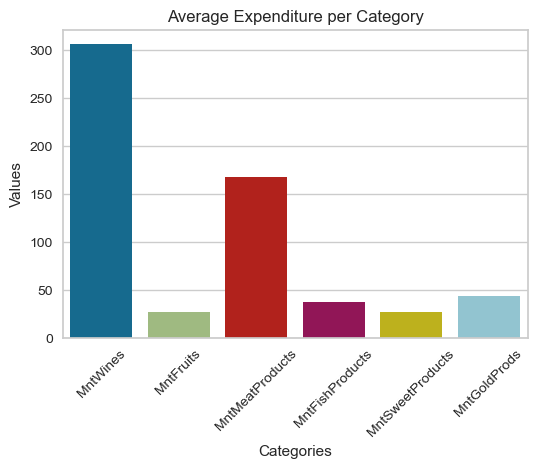

In [20]:
# average purchase for each category 
total_expenditure = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

total_customers = len(df)

average_expenditure = total_expenditure / total_customers 

plt.figure(figsize=(6,4))
sns.barplot(x=average_expenditure.index, y=average_expenditure.values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.title('Average Expenditure per Category')
print(average_expenditure )

Text(0.5, 1.0, 'Distribution Plot of Recency')

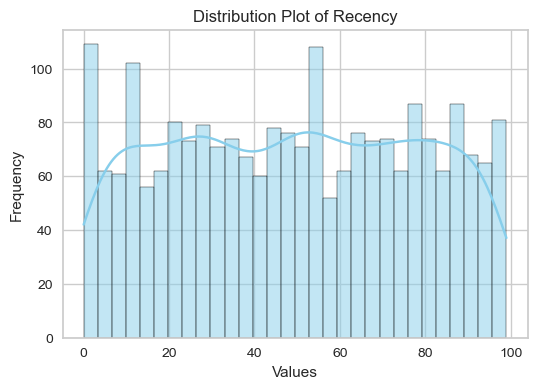

In [21]:
# What is the recency distribution?
plt.figure(figsize=(6,4))
sns.histplot(df['Recency'], bins=30, kde=True, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Recency')

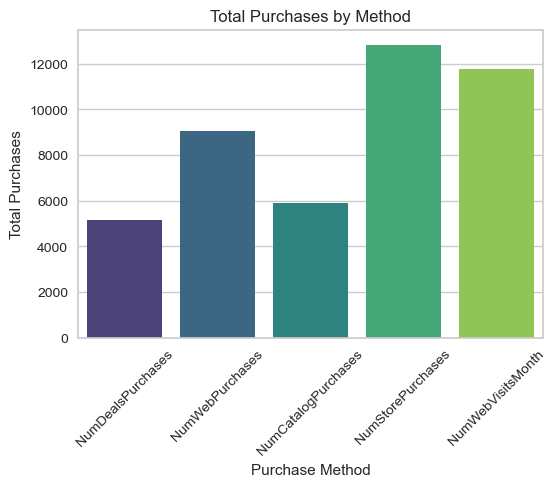

In [22]:
# How are the purchases commonly done? 
total_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                        'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=total_purchases .index, y=total_purchases .values, palette='viridis')
plt.xlabel('Purchase Method')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Method')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

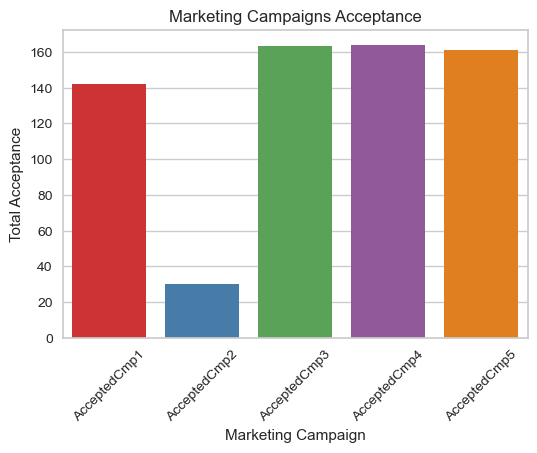

In [23]:
# Which marketing Campaign is effective?
total_accepted = df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3',
                   'AcceptedCmp4', 'AcceptedCmp5']].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=total_accepted.index, y=total_accepted.values, palette='Set1')
plt.xlabel('Marketing Campaign')
plt.ylabel('Total Acceptance')
plt.title('Marketing Campaigns Acceptance')
plt.xticks(rotation=45) 
plt.show()

### 4.0 Preprocessing for Clustering 
- Standard Scaling 
- PCA for dimensionality Reduction

In [24]:
# Standard Scaling 
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

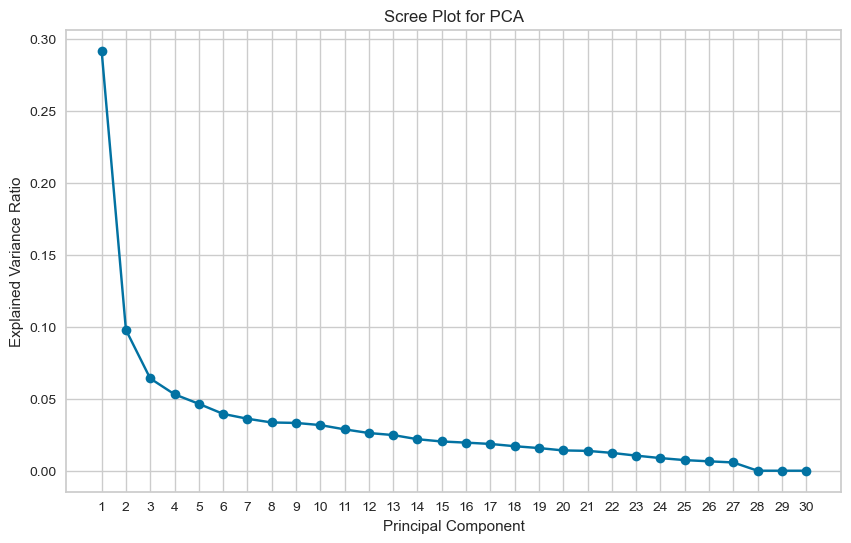

In [25]:
# PCA 
pca = PCA()
pca.fit(scaled_df)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [26]:
# use three pca components
pca3 = PCA(n_components=3)
pca_components = pca3.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,4.926202,-0.332625,0.158161
1,-2.936980,0.027524,-0.423769
2,2.375189,-0.705100,-1.187289
3,-2.721659,-1.482928,-0.085709
4,-0.804071,0.121259,-0.780433


### Clustering - KMeans
- Elbow to consider how many cluster
- K-Means

In [27]:
# Perform K-means clustering
# Consider 1 to 10 clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    # run the algortihm at many different starting points
                    random_state = 42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

C:\Users\suetl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suetl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suetl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\suetl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

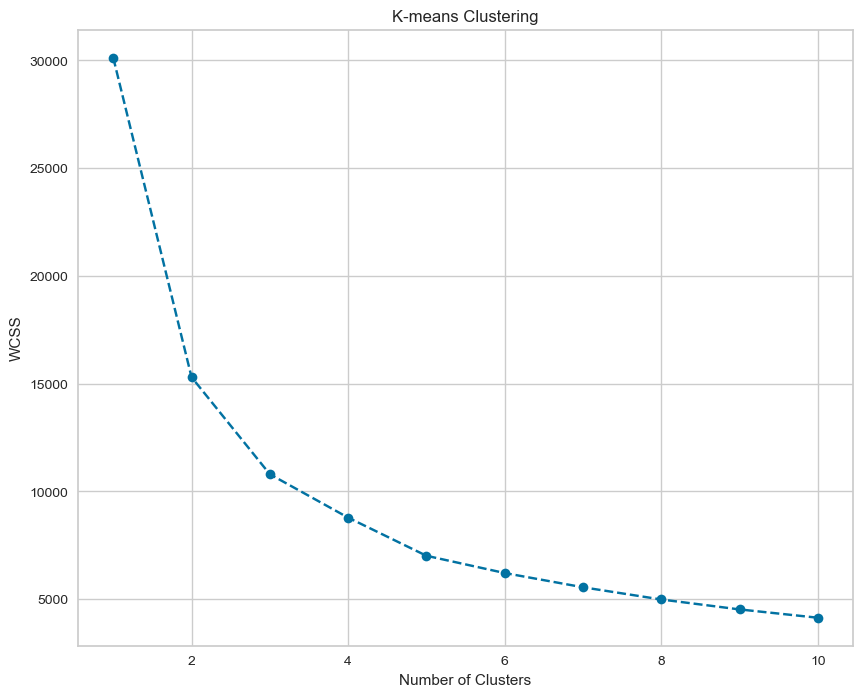

In [29]:
# Plot the Within Cluster Sum of Squares for the different number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [30]:
# 4 Clusters to get K-Means

# Same initializer and random state as before
kmeans_pca = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(pca_df)

C:\Users\suetl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [31]:
# Get the cluster labels assigned to each data point
cluster_labels = kmeans_pca.labels_

# Add cluster labels to the PCA DataFrame
df['Cluster_Labels'] = cluster_labels

# Print the count of data points in each cluster
print(df['Cluster_Labels'].value_counts())


Cluster_Labels
0    1058
3     600
1     417
2     137
Name: count, dtype: int64


In [32]:
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4174864907224333


In [33]:
inertia = kmeans_pca.inertia_
print("Inertia:", inertia)

Inertia: 8782.746313759759


In [34]:
cluster_means = df.groupby(['Cluster_Labels']).mean()
cluster_means

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Tenure,Total_Spent,Children,Family_Size,Is_Parent,Education_Encoded,Living_With_Encoded
Cluster_Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34937.787335,0.779773,0.457467,48.925331,47.351607,5.036862,24.889414,7.386578,5.054820,16.082231,2.116257,2.235350,0.574669,3.278828,6.500945,0.072779,0.009452,0.000000,0.000000,0.001890,0.011342,0.092628,52.539698,10.885633,105.801512,1.237240,2.881853,0.880907,0.664461,0.644612
1,73607.971223,0.014388,0.059952,51.609113,509.525180,66.800959,440.129496,99.549161,68.671463,74.541966,1.167866,4.868106,5.621103,8.251799,2.690647,0.043165,0.033573,0.107914,0.095923,0.000000,0.004796,0.153477,56.455635,10.956835,1259.218225,0.074341,1.661871,0.074341,0.551559,0.587530
2,80468.562044,0.036496,0.116788,43.175182,915.000000,52.029197,453.781022,75.087591,58.313869,75.941606,1.116788,5.642336,6.204380,8.124088,3.496350,0.218978,0.481752,0.788321,0.598540,0.182482,0.007299,0.810219,53.109489,11.072993,1630.153285,0.153285,1.722628,0.138686,0.605839,0.569343
3,60416.655000,0.235000,0.990000,48.720000,478.951667,29.880000,162.391667,39.441667,29.756667,64.435000,3.771667,6.458333,3.515000,8.035000,5.486667,0.063333,0.123333,0.013333,0.033333,0.005000,0.008333,0.100000,59.076667,11.111667,804.856667,1.225000,2.930000,0.996667,0.555000,0.705000


## Checking Demographic

- Cluster 0 : Lower Income, Lower Purchasing Power, Large family Size. 
- Cluster 1 : Upper Middle Income
- Cluster 2 : High Income, High Purchasing Power
- Cluster 3 : Middle Income 

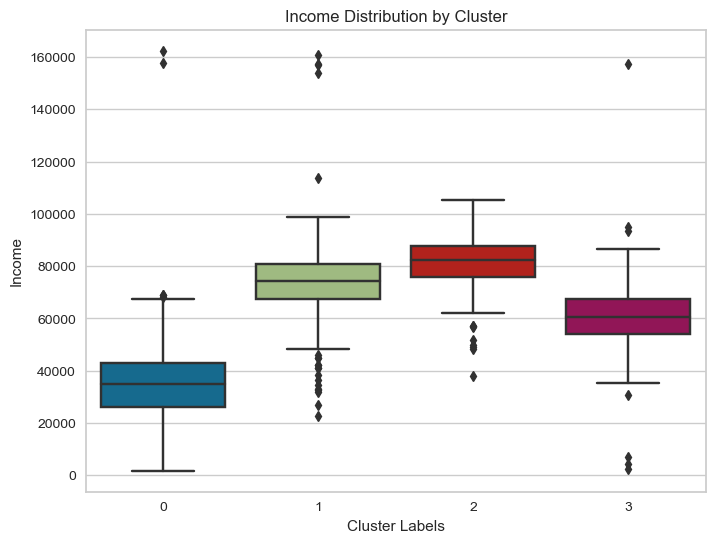

In [35]:
# Income 
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Labels', y='Income', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('Income')
plt.title('Income Distribution by Cluster')
plt.show()

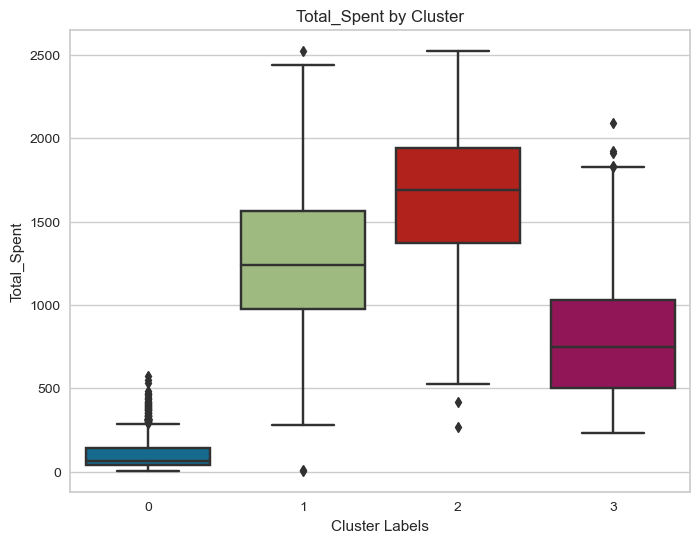

In [36]:
# Total Spent
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Labels', y='Total_Spent', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('Total_Spent')
plt.title('Total_Spent by Cluster')
plt.show()

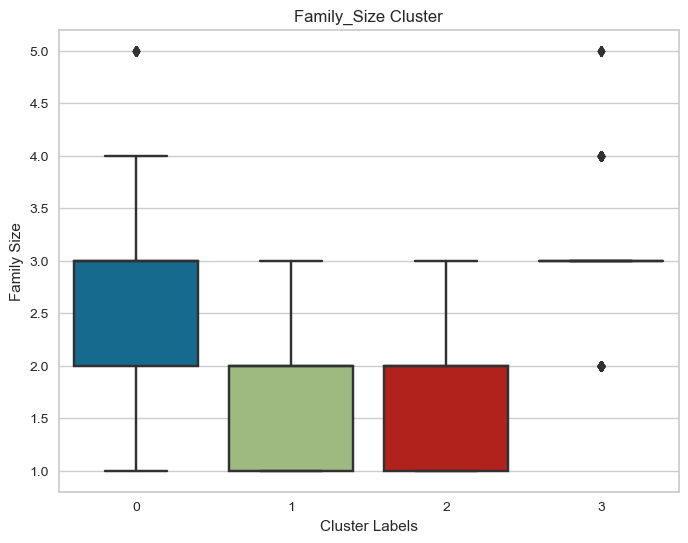

In [37]:
# Family Size 
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_Labels', y='Family_Size', data=df)
plt.xlabel('Cluster Labels')
plt.ylabel('Family Size')
plt.title('Family_Size Cluster')
plt.show()

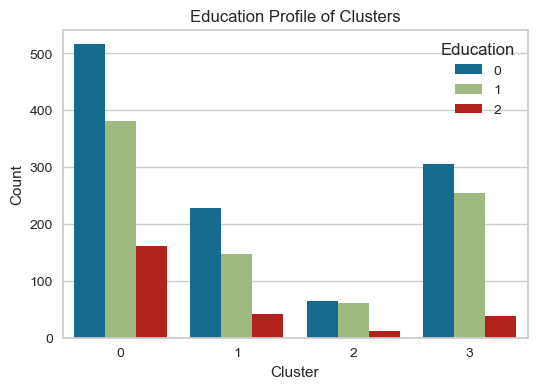

In [38]:
# Plot stacked bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster_Labels', hue='Education_Encoded', data=df)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Education Profile of Clusters')
plt.legend(title='Education', loc='upper right')
plt.xticks(rotation=0)
plt.show()

### Spending Habits Analysis

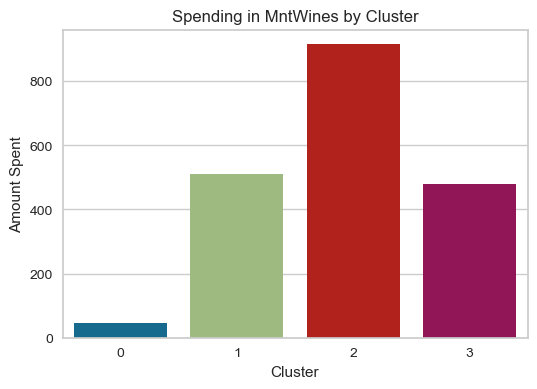

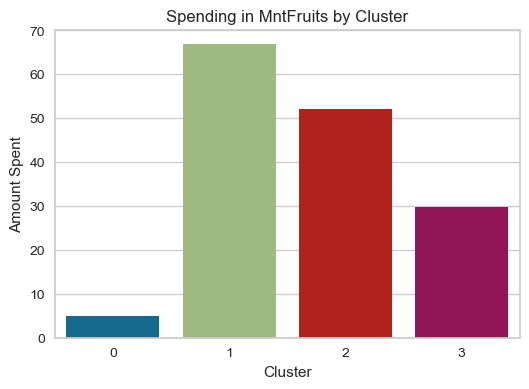

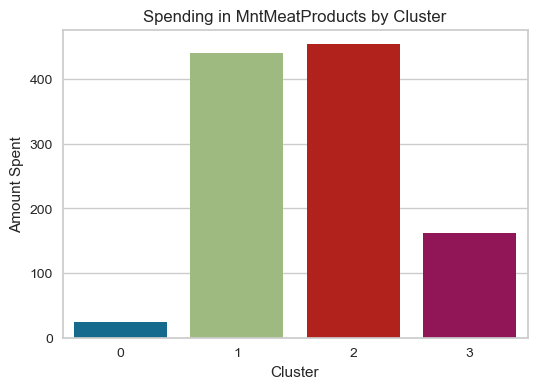

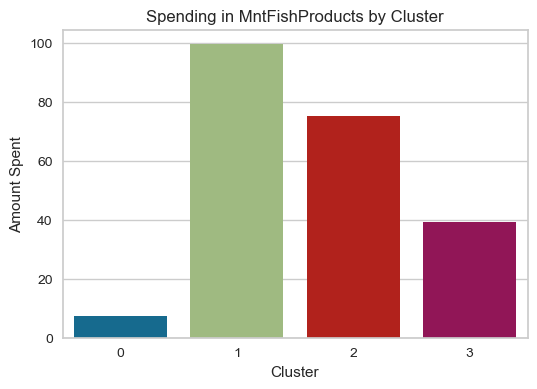

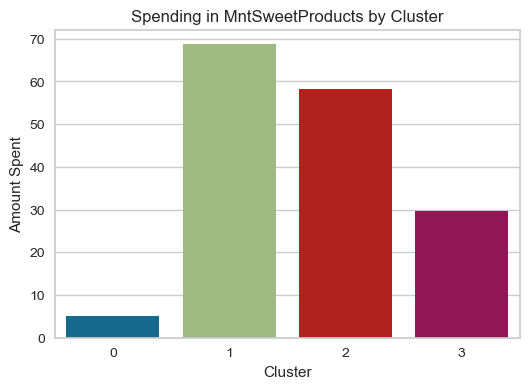

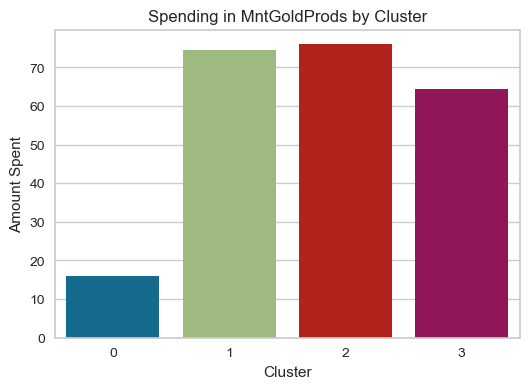

In [39]:
food_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Iterate through each food category and create a bar plot for each
for category in food_categories:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Cluster_Labels', y=category, data=df, errorbar=None)
    plt.xlabel('Cluster')
    plt.ylabel('Amount Spent')
    plt.title(f'Spending in {category} by Cluster')
    plt.xticks(rotation=0)
    plt.show()

## Marketing Campaign Analysis

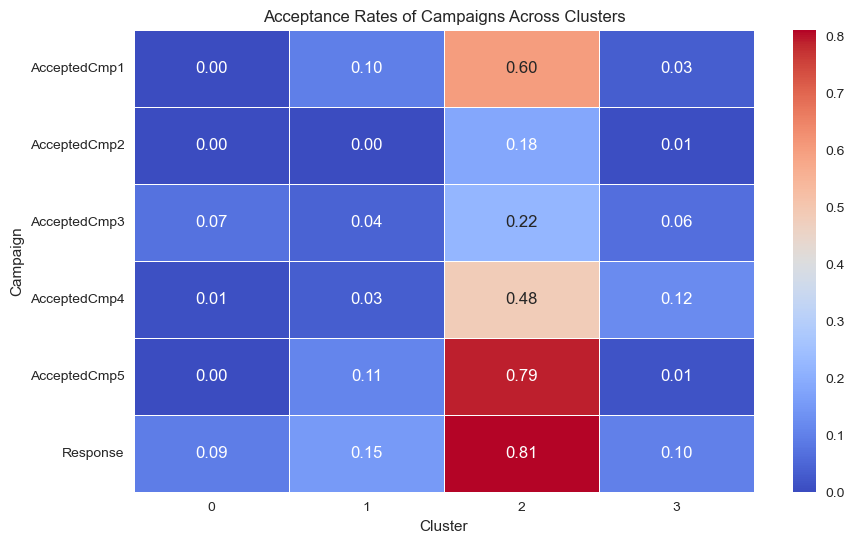

In [40]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance_rates = df.groupby('Cluster_Labels')[campaign_columns].mean()

# Visualize the acceptance rates using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(campaign_acceptance_rates.T, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Acceptance Rates of Campaigns Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Campaign')
plt.show()

## How each group make their purchases

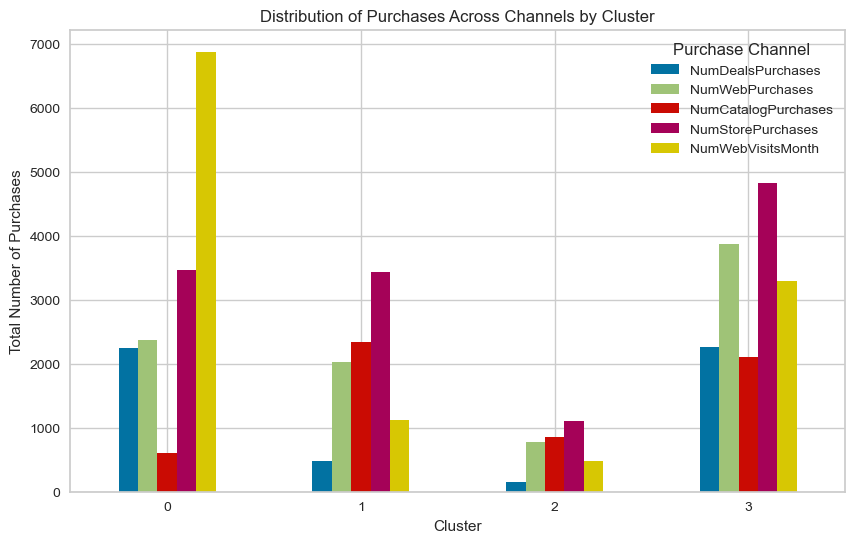

In [42]:
# Calculate the total number of purchases made through each channel for each cluster
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']
purchase_distribution = df.groupby('Cluster_Labels')[purchase_channels].sum()

# Visualize the distribution of purchases across channels using a stacked bar plot
purchase_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Distribution of Purchases Across Channels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Purchase Channel')
plt.show()